#Pendahuluan

## Latar Belakang

Asuransi kesehatan merupakan aspek krusial dalam sistem kesehatan karena memberikan perlindungan finansial terhadap risiko medis yang tak terduga. Biaya asuransi kesehatan sering kali dipengaruhi oleh sejumlah faktor, termasuk usia, jenis kelamin, indeks massa tubuh (BMI), status merokok, dan kondisi demografis lainnya. Pemahaman yang mendalam mengenai hubungan antara faktor-faktor tersebut dengan biaya asuransi dapat membantu perusahaan asuransi dalam menentukan premi yang adil dan sesuai dengan risiko yang ditanggung.

Dalam upaya menghasilkan model prediksi yang akurat untuk biaya asuransi, analisis regresi menjadi metode yang umum digunakan. Analisis ini tidak hanya memungkinkan perusahaan asuransi untuk memprediksi biaya kesehatan, tetapi juga mengidentifikasi variabel-variabel yang memiliki dampak signifikan terhadap pengeluaran tersebut. Sebagai contoh, status merokok dikenal sebagai salah satu faktor risiko terbesar yang berhubungan langsung dengan meningkatnya biaya kesehatan, sementara BMI dapat mencerminkan risiko terkait obesitas dan penyakit kronis lainnya.

Penelitian ini bertujuan untuk memanfaatkan analisis korelasi dan regresi guna mengevaluasi faktor-faktor yang memengaruhi biaya asuransi kesehatan, serta mengembangkan model prediksi yang dapat digunakan oleh industri asuransi. Dengan adanya pemodelan ini, diharapkan akan tersedia pendekatan berbasis data yang lebih akurat dalam penentuan premi asuransi, sehingga dapat mendukung kebijakan yang lebih adil serta membantu masyarakat dalam merencanakan keuangan kesehatan mereka.


## Data

Sumber Data: https://www.kaggle.com/datasets/mirichoi0218/insurance

##Rumusan Masalah

1.   Bagaimana kekuatan dan arah hubungan antara variabel prediktor dengan variabel respon?

2.   Bagaimana cara membangun model regresi dapat digunakan untuk memprediksi biaya asuransi berdasarkan variabel prediktor yang ada?

3.   Sejauh mana akurasi dan interpretasi model regresi dalam memprediksi biaya asuransi?




## Tujuan



1.   Menilai kekuatan hubungan antara setiap variabel prediktor (misalnya, usia, BMI, status merokok) dengan variabel respon (biaya asuransi kesehatan).

2.   Membangun model regresi yang dapat memperkirakan biaya asuransi dengan mempertimbangkan berbagai faktor prediktor sehingga dapat digunakan untuk prediksi biaya asuransi di masa mendatang.

3. Mengukur keakuratan model dalam melakukan prediksi biaya asuransi serta melihat bagaimana interpretasi hasil model dapat digunakan untuk pengambilan keputusan yang lebih baik dalam konteks asuransi kesehatan.




# *Preprocessing*

##*Import  Moduls*

In [ ]:
# Import Modules
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
import missingno as msno
import kagglehub

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

##*Import* Data

In [ ]:
path = kagglehub.dataset_download("mirichoi0218/insurance")
data = pd.read_csv(path + '/insurance.csv')

## Informasi Data

In [ ]:
# Data Size
N, P = data.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)

# Variable Type
print("Tipe Variabel data = ", type(data))

baris =  1338 , Kolom (jumlah variabel) =  7
Tipe Variabel data =  <class 'pandas.core.frame.DataFrame'>


Data terdiri dari 1338 baris dan 7 kolom.

In [ ]:
#Melihat 5 awal data
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Melihat tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Berdasarkan tipenya terdapat 4 data numerik yaitu ‘age’, ‘bmi’, ‘children’, dan ‘charges’ serta 3 data kategorik yaitu ‘sex’ yang terdiri atas *binary* male/female, ‘smoker’ yang terdiri atas *binary* yes/no, dan ‘region’ yang terdiri atas 4 lokasi geografis.

## Informasi Variabel

* `age`: Usia seseorang dalam tahun, bertipe numerik.
* `sex`: Jenis Kelamin, bertipe kategorik.
* `bmi`: Body Mass Index, yaitu ukuran standar untuk menilai komposisi tubuh berdasarkan tinggi dan berat badan, bertipe numerik.
* `children`: Jumlah anak yang dimiliki individu, bertipe numerik.
* `smoker`: Status merokok (yes or no), bertipe kategorik.
* `region`: Lokasi geografis di US (northeast, southeast, southwest, northwest), bertipe kategorik.
* `charges`: Total biaya asuransi kesehatan yang dibebankan kepada setiap individu, bertipe numerik.

Terdapat tiga variabel bertipe kategorik (sex, smoker, region) dan empat variabel bertipe numerik (age, bmi, children, smoke, region). Terlihat juga bahwa seluruh variabel memiliki jumlah data non-null yang sama sehingga tidak ada concern lebih lanjut terkait hal ini.

Akan dilakukan model analisis regresi dengan variabel respon adalah charges (biaya asuransi) dan 6 variabel lainnya (age, sex, bmi, children, smoke, region) sebagai variabel penjelas yang diduga berkontribusi terhadap nilai charges (biaya asuransi).

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Output tersebut menampilkan statistik deskriptif dari masing-masing variabel numerik. Terlihat bahwa terdapat perbedaan skala dari masing-masing variabel numerik. Perbedaan skala data bisa membuat variabel dengan nilai lebih kecil, seperti age, terlihat memiliki kontribusi yang kurang signifikan. Hal ini akan memengaruhi interpretasi yang didapat dari model regresi linier bisa saja misleading. Untuk memastikan setiap variabel memiliki pengaruh yang sama dalam model, perlu dilakukan standardisasi data seperti scaling data.

## Penanganan *Missing Value*

In [ ]:
#Melihat persentase *missing value* antar kolom

missing = (data.isnull().sum() / len(data)) * 100

missing_df = pd.DataFrame({'Kolom': missing.index, 'Persentase Missing': missing.values})
print(missing_df)

      Kolom  Persentase Missing
0       age                 0.0
1       sex                 0.0
2       bmi                 0.0
3  children                 0.0
4    smoker                 0.0
5    region                 0.0
6   charges                 0.0


Berdasarkan output yang ditampilkan, setiap kolom memiliki missing value 0.0%. Hal tersebut menunjukkan bahwa dataset ini tidak memiliki missing value. Dengan demikian, dataset ini siap untuk dianalisis lebih lanjut tanpa perlu melakukan penanganan missing value.

## Penanganan Duplikasi Data

In [ ]:
print(data.shape)
data.duplicated().sum()

(1338, 7)


1

In [ ]:
#Menunjukkan duplikasi
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


Berdasarkan output, terlihat bahwa terdapat 1 data duplikat dari 1338 baris. Duplikasi data tersebut berada pada baris 581, berisi data seorang pria berusia 19 tahun dengan BMI 30.59, tidak memiliki anak, tidak merokok, tinggal di wilayah barat laut (northwest), dan memiliki biaya asuransi sebesar 1639.5631.
Baris duplikat ini memiliki nilai yang sama persis di seluruh kolom dengan salah satu baris lainnya sehingga dianggap sebagai data yang berulang. Adanya duplikasi data ini mungkin karena kesalahan saat pengumpulan data. Namun karena hanya 1 duplikat dari 1338 baris, maka tidak akan dilakukan penghapusan karena dampaknya terhadap analisis sangat kecil. Dalam dataset besar, satu duplikasi tidak akan mempengaruhi hasil secara signifikan. Selain itu, duplikasi tersebut bisa jadi menunjukkan bahwa data tersebut relevan, sehingga menghapusnya mungkin akan menghilangkan informasi penting.


## Penanganan *Outlier*

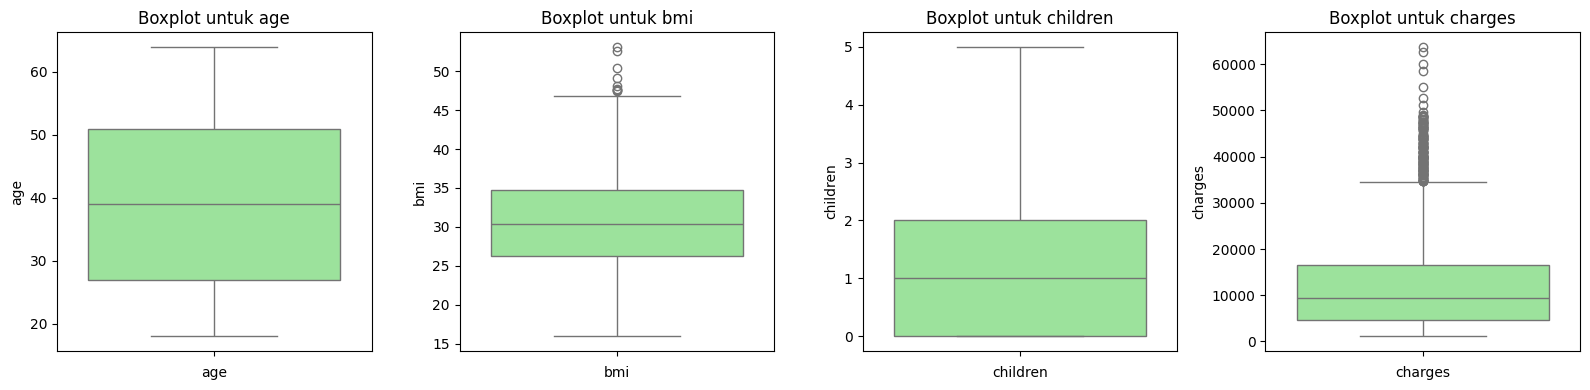

In [ ]:
# Visualisasi persebaran data numerik

data_numerik = data.select_dtypes(include=['float64', 'int64'])

num_cols = 4
num_rows = (len(data_numerik.columns) + num_cols - 1) // num_cols
plt.figure(figsize=(num_cols * 4, num_rows * 4))

for i, col in enumerate(data_numerik.columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=data_numerik[col], color='lightgreen')
    plt.title(f'Boxplot untuk {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Pada plot, terlihat bahwa terdapat permasalahan *outlier* pada variabel `charges` dan `bmi`. Oleh karena itu, akan dilihat rentang nilai dari kedua variabel tersebut.





In [ ]:
# Menggunakan describe untuk melihat statistik dari kolom 'bmi' dan 'charges'
print(data[['bmi', 'charges']].describe())

               bmi       charges
count  1338.000000   1338.000000
mean     30.663397  13270.422265
std       6.098187  12110.011237
min      15.960000   1121.873900
25%      26.296250   4740.287150
50%      30.400000   9382.033000
75%      34.693750  16639.912515
max      53.130000  63770.428010


1. **Kolom `bmi`**:
Rentang BMI mulai dari 15.96 hingga 53.13 masih masuk akal. Nilai rendah dan tinggi ini bisa mewakili kelompok-kelompok dengan indeks massa tubuh yang sangat berbeda, seperti individu yang sangat kurus atau obesitas. Variasi ini penting karena BMI sering berkaitan dengan biaya kesehatan.
  
2. **Kolom `charges`**:
Nilai `min` dan `max` berkisar antara 1,121 hingga 63,770, menunjukkan variasi biaya yang besar, yang mungkin mencakup biaya dasar hingga pengeluaran besar untuk perawatan khusus atau jangka panjang.

Nilai-nilai dalam kolom `bmi` dan `charges` tampak wajar dan tidak menunjukkan outlier yang mencolok, sehingga kami menganggap observasi tersebut tetap relevan untuk model, dan kami tidak drop dari model. Namun, nanti akan dilakukan perbandingan antar model yang menggunakan *outliers* dan tidak pada pemodelan regresi.

#EDA

## Distribusi Variabel Kategorik

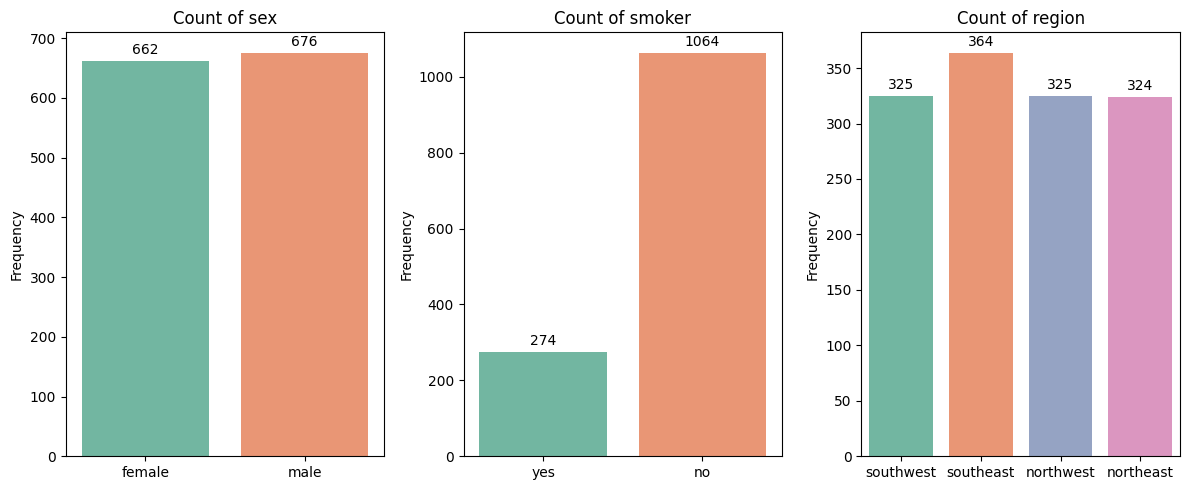

In [ ]:
df = data.copy()
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
num_categorical = len(categorical_columns)

fig, axes = plt.subplots(nrows=1, ncols=num_categorical, figsize=(num_categorical * 4, 5))

for i, col in enumerate(categorical_columns):
    ax = sns.countplot(data=df, x=col, palette="Set2", ax=axes[i])
    axes[i].set_title(f'Count of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

Berdasarkan gambar di atas, terlihat bahwa jumlah kategorik laki-laki dan perempuan pada variabel `sex` memiliki jumlah yang relatif sama secara proporsi. Namun, dalam variabel `smoker`, berisikan kategorik yang didominasi oleh non-perokok dibandingkan perokok. Meskipun begitu, dalam variabel `region`, terlihat bahwa southeast sedikit lebih banyak dibandingkan dengan 3 region lain yang relatif sama secara proporsional.


##Heatmap Korelasi

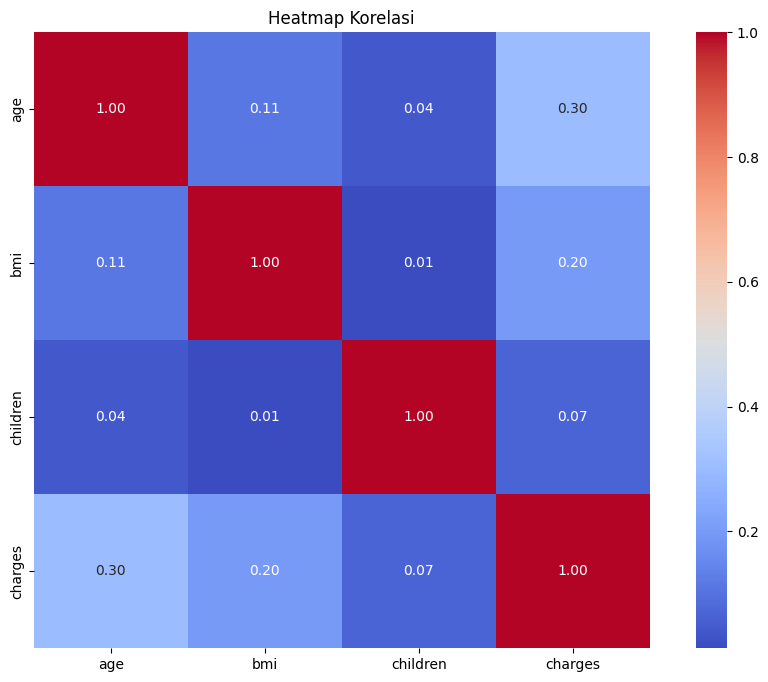

In [ ]:
#Heatmap korelasi

plt.figure(figsize=(12, 8))
variabel = data.select_dtypes(include=['float64', 'int64'])
korelasi = variabel.corr()
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Heatmap Korelasi')
plt.show()

Berdasarkan gambar di atas, terlihat bahwa tidak terdapat korelasi yang signifikan antara variabel independen numerik dengan variabel dependen charges. Hubungan antar variabel independen juga cenderung lemah.


## Distribusi Variabel Numerik

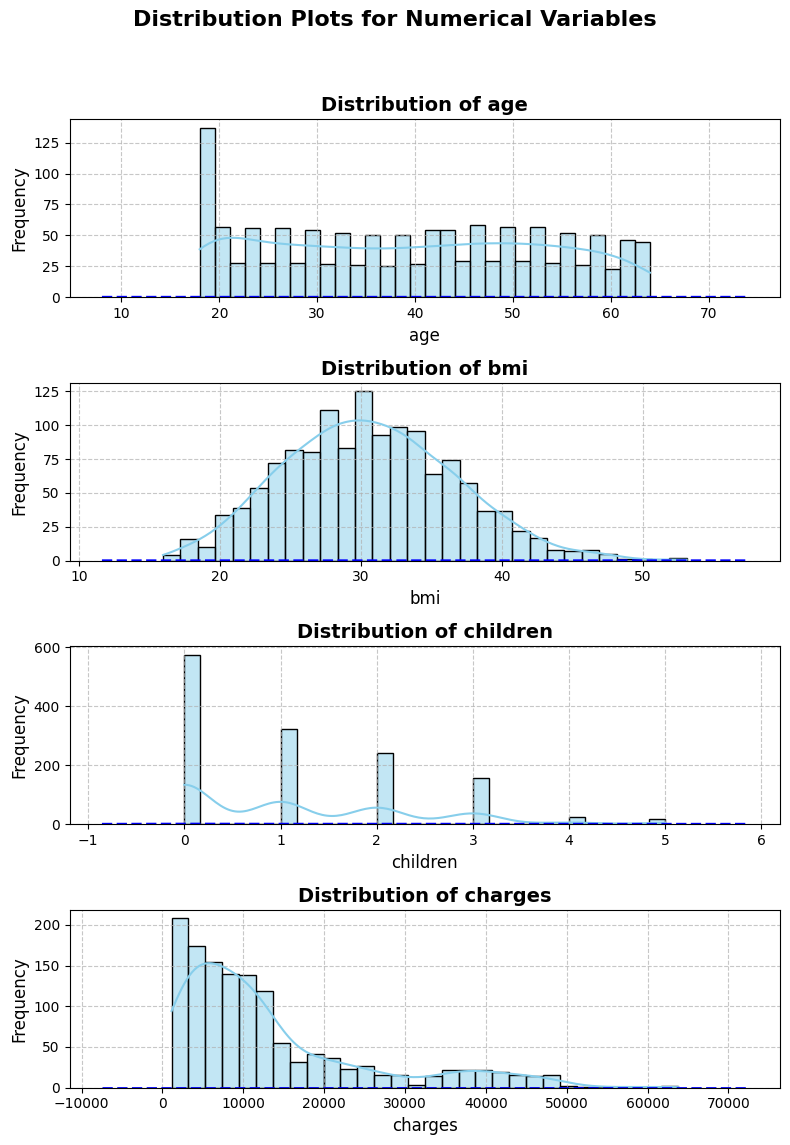

In [ ]:
df_num = df._get_numeric_data()
num_columns = df_num.shape[1]

fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, num_columns * 3), dpi=100)
fig.suptitle("Distribution Plots for Numerical Variables", fontsize=16, fontweight='bold')

for i, col in enumerate(df_num.columns):
    sns.histplot(df_num[col], kde=True, color='skyblue', ax=axes[i], bins=30, edgecolor='black')

    sns.kdeplot(df_num[col], color='blue', ax=axes[i], lw=2, linestyle="--")

    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.7)

    axes[i].set_ylim(0, None)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Distribusi Usia (age):
* Bentuk: Distribusi tampak cenderung miring ke kiri (skewed left), dengan jumlah terbesar terlihat di usia muda (di bawah 30 tahun) dan berkurang di usia yang lebih tua.
* Poin Utama: Banyak individu dalam kelompok usia yang lebih muda, menunjukkan bahwa dataset ini mungkin memiliki proporsi lebih besar dari pengguna yang lebih muda. Ada juga beberapa nilai ekstrem di usia lebih tua, tetapi jumlahnya tidak signifikan.

Distribusi BMI (bmi):
* Bentuk: Distribusi BMI menunjukkan pola distribusi normal (bell-shaped) dengan puncak di sekitar 30, yang menunjukkan konsentrasi individu di kisaran BMI tersebut.
* Poin Utama: Dengan rata-rata BMI di sekitar 30, mungkin ada kecenderungan ke arah kelebihan berat badan. Ini juga menunjukkan bahwa dataset mencakup proporsi orang dengan BMI sehat serta yang lebih tinggi.

Distribusi Anak (children):
* Bentuk: Distribusi menunjukkan bahwa sebagian besar individu tidak memiliki anak (nilai 0), dengan frekuensi menurun seiring bertambahnya jumlah anak.
Poin Utama: Banyak individu dalam dataset ini adalah tanpa anak, sementara jumlah individu dengan lebih dari 2 anak sangat sedikit. Hal ini menunjukkan bahwa mayoritas pengguna cenderung tidak memiliki anak.
Distribusi Biaya (charges):
* Bentuk: Distribusi menunjukkan skewness yang sangat besar ke kanan, di mana sebagian besar individu memiliki biaya yang rendah (di bawah 10,000) dan ada beberapa individu dengan biaya yang jauh lebih tinggi (hingga 70,000).
Poin Utama: Sebagian besar individu membayar biaya yang lebih rendah, tetapi ada sejumlah kecil individu dengan biaya sangat tinggi. Ini menunjukkan kemungkinan bahwa ada kelompok tertentu yang membayar lebih banyak untuk layanan atau perawatan yang lebih intensif.

Distribusi Biaya (charges):
* Bentuk: Distribusi menunjukkan skewness yang sangat besar ke kanan, di mana sebagian besar individu memiliki biaya yang rendah (di bawah 10,000) dan ada beberapa individu dengan biaya yang jauh lebih tinggi (hingga 70,000).
* Poin Utama: Sebagian besar individu membayar biaya yang lebih rendah, tetapi ada sejumlah kecil individu dengan biaya sangat tinggi. Ini menunjukkan kemungkinan bahwa ada kelompok tertentu yang membayar lebih banyak untuk layanan atau perawatan yang lebih intensif.


## Pairplot

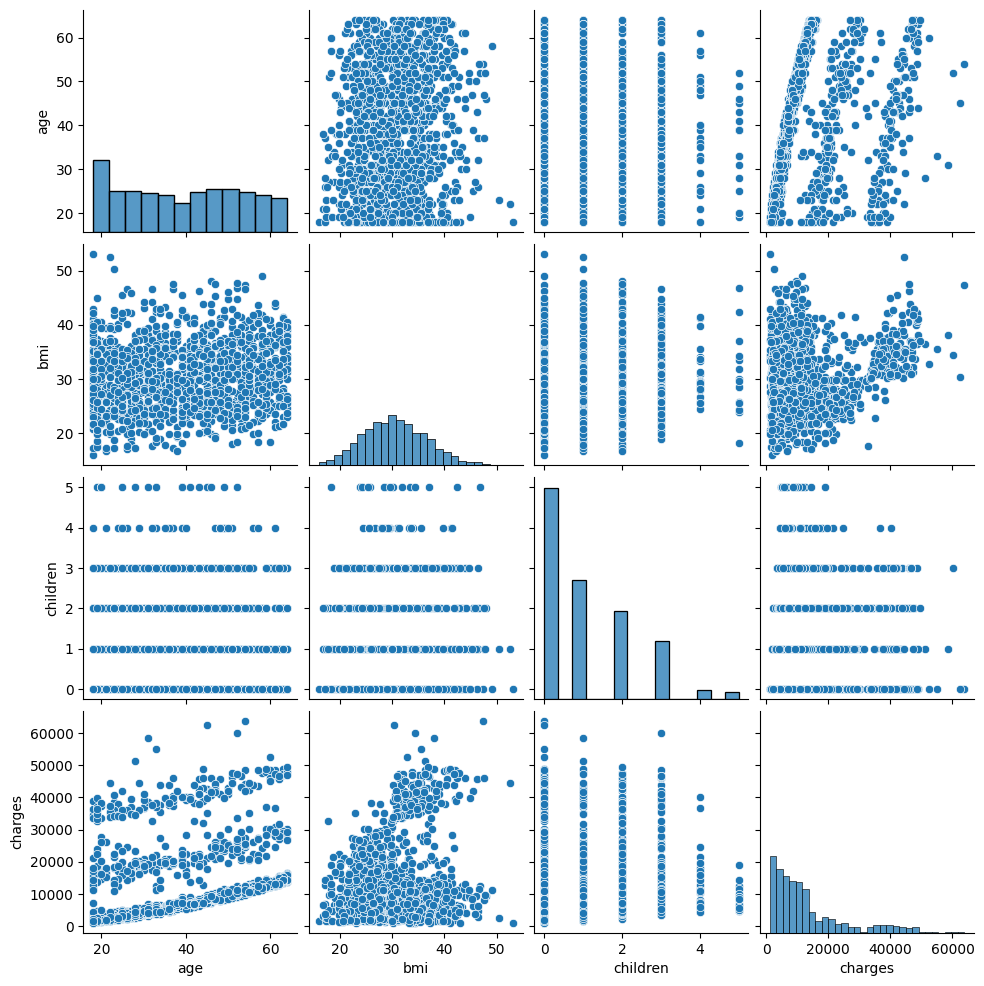

In [ ]:
pairplot = sns.pairplot(data)
plt.show()

Distribusi Variabel:

* Umur (age): Distribusi menunjukkan bahwa sebagian besar individu berusia antara 20 hingga 40 tahun, dengan beberapa di atas 60.
* BMI (bmi): Distribusi BMI tampak normal, dengan konsentrasi di sekitar 30, yang menunjukkan bahwa banyak individu memiliki BMI yang lebih tinggi.
Jumlah Anak (children): Ada konsentrasi besar individu yang tidak memiliki anak (nilai 0), dengan penurunan yang signifikan pada individu dengan 2 atau lebih anak.
* Biaya (charges): Terdapat variasi yang besar dalam biaya, dengan sebagian besar individu memiliki biaya rendah, tetapi ada beberapa individu dengan biaya tinggi.

Hubungan antar Variabel:

* Age dan Charges: Ada hubungan positif antara usia dan biaya, di mana individu yang lebih tua cenderung memiliki biaya lebih tinggi. Ini menunjukkan bahwa usia mungkin menjadi faktor dalam biaya kesehatan.
* BMI dan Charges: Ada juga pola positif antara BMI dan biaya. Individu dengan BMI lebih tinggi mungkin menghadapi biaya lebih tinggi, menunjukkan bahwa kesehatan yang lebih buruk berpotensi berkontribusi terhadap biaya yang lebih tinggi.
* Children dan Charges: Hubungan antara jumlah anak dan biaya tampak kurang jelas, tetapi individu yang tidak memiliki anak memiliki variasi biaya yang lebih besar dibandingkan dengan mereka yang memiliki anak.
Children dan Age: Terlihat bahwa individu dengan anak cenderung lebih tua, tetapi distribusinya menunjukkan bahwa ada juga individu yang lebih muda dengan anak.


Hubungan antar variabel ini dapat menjadi ide untuk model dengan interaksi namun dikarenakan terbentuk hubungan antar variabel respon dan penjelas maka tidak dapat digunakan ide interaksi antar variabel.

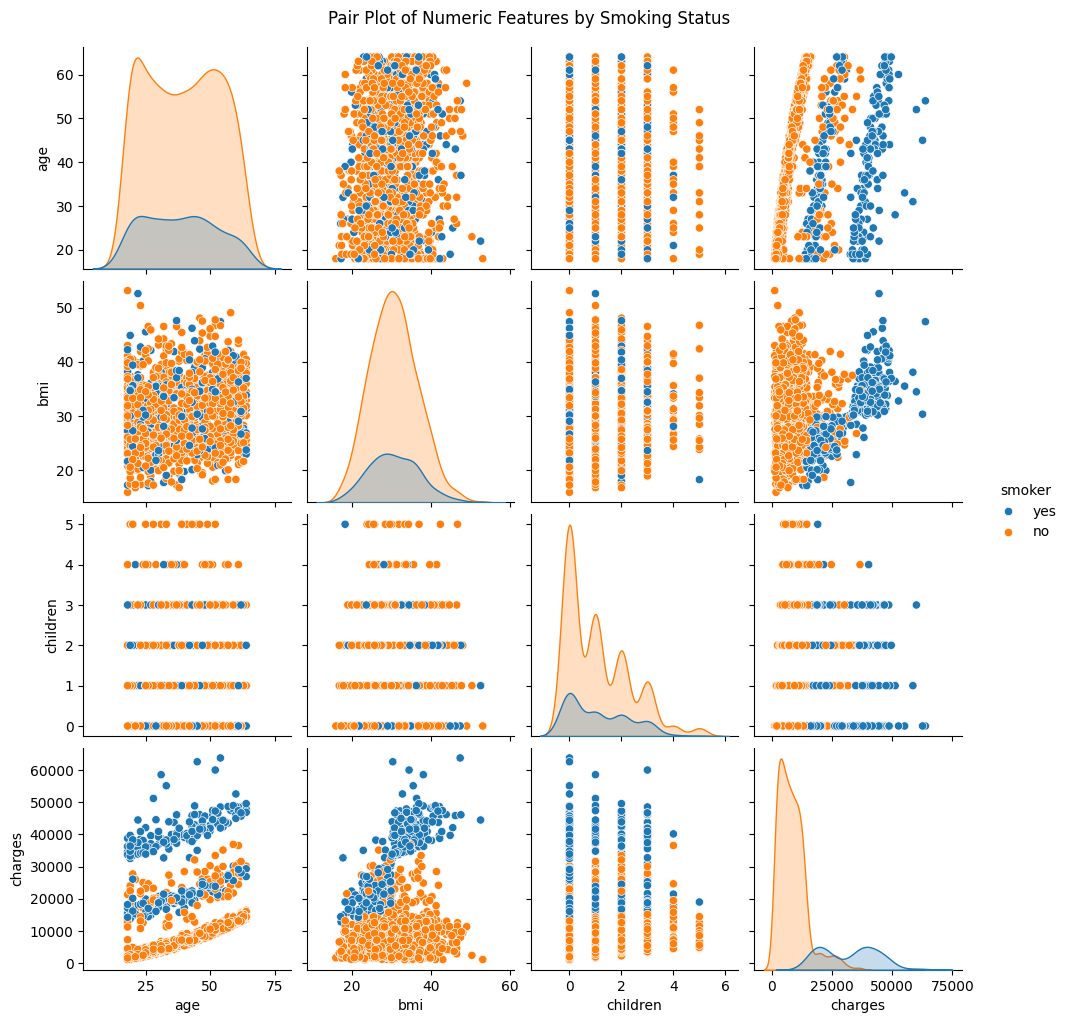

In [ ]:
sns.pairplot(df, hue='smoker')
plt.suptitle("Pair Plot of Numeric Features by Smoking Status", y=1.02)
plt.show()

Distribusi Usia (Age):

* Status Merokok: Distribusi usia menunjukkan bahwa perokok (biru) cenderung lebih tua dibandingkan dengan bukan perokok (oranye).
* Poin Utama: Ini menunjukkan bahwa lebih banyak individu yang merokok berada di rentang usia yang lebih tinggi, mengindikasikan bahwa kebiasaan merokok lebih umum di kelompok usia yang lebih tua.

Distribusi BMI:

* Status Merokok: Grafik ini menunjukkan bahwa perokok dan bukan perokok memiliki rentang BMI yang serupa, tetapi dengan puncak yang lebih tinggi untuk bukan perokok.
* Poin Utama: Gambar menunjukkan kemungkinan bahwa perokok cenderung memiliki BMI yang lebih tinggi, atau sebaliknya, orang dengan BMI yang lebih tinggi lebih cenderung merokok.

Jumlah Anak (Children):

* Status Merokok: Distribusi menunjukkan bahwa perokok dan bukan perokok memiliki jumlah anak yang mirip, dengan sebagian besar individu tidak memiliki anak.
* Poin Utama: Tidak ada hubungan yang jelas antara jumlah anak dan status merokok dalam visualisasi ini.

Biaya (Charges):

* Status Merokok: Terdapat pola yang jelas bahwa perokok cenderung memiliki biaya yang lebih tinggi dibandingkan dengan bukan perokok. Dalam scatter plot, titik-titik biru (perokok) terlihat lebih tinggi dalam hal biaya dibandingkan titik oranye (bukan perokok).
* Poin Utama: Ini menunjukkan bahwa merokok mungkin berkontribusi pada biaya kesehatan yang lebih tinggi, mengindikasikan bahwa perokok mungkin mengalami masalah kesehatan yang lebih serius atau memerlukan perawatan medis yang lebih intensif.

## Multikolinearitas

In [ ]:
X = df_num

X['Intercept'] = 1

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,age,1.101927
1,bmi,1.043934
2,children,1.005193
3,charges,1.136490
4,Intercept,32.325902


Terlihat bahwa variabel `age`, `bmi`, `children`, dan `charges` memiliki nilai VIF < 10. Artinya, tidak ada multikolinearitas dalam setiap variabel pada data

#Standardisasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

variabel_numerik = data.select_dtypes(include=['float64', 'int64']).columns
variabel_numerik = variabel_numerik[variabel_numerik != 'charges']

scaler = MinMaxScaler()
data_scaled = data.copy()
data_scaled[variabel_numerik] = scaler.fit_transform(data_scaled[variabel_numerik])

data_scaled.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,16884.92400
1,0.000000,male,0.479150,0.2,no,southeast,1725.55230
2,0.217391,male,0.458434,0.6,no,southeast,4449.46200
3,0.326087,male,0.181464,0.0,no,northwest,21984.47061
4,0.304348,male,0.347592,0.0,no,northwest,3866.85520


Berdasarkan code Standardisasi di atas ditunjukkan untuk mengubah nilai variabel agar berada dalam rentang tertentu, dalam hal ini antara 0 dan 1. Tujuan dari standarisasi ini adalah untuk menyamakan skala antar variabel numerik sehingga model machine learning dapat bekerja lebih baik tanpa dipengaruhi oleh variabel dengan skala yang lebih besar.
Langkah-langkah yang dilakukan adalah memilih kolom-kolom numerik age, bmi, dan children yang ingin distandarisasi kecuali charges karena variabel ini merupakan variabel respon yang akan diprediksi dan diharuskakn dengan nilai sebenarnya. Setelah kolom-kolom ini dipilih, MinMaxScaler digunakan untuk mengubah nilai-nilai tersebut ke dalam rentang 0 hingga 1, di mana nilai minimum pada tiap kolom menjadi 0 dan nilai maksimum menjadi 1. Hasil transformasi ini kemudian disimpan kembali ke dalam dataset, menggantikan nilai-nilai asli pada kolom-kolom tersebut.

#Pemodelan
Akan dilakukan beberapa pemodelan berdasarkan data dan variabel yang ada. Pada pemodelan ini sudah membentuk variabel kategorik seperti ‘sex’, ‘smoker’ dan ‘region’ menjadi variabel dummy.

## Model1
Pada model ini, akan digunakan seluruh variabel penjelas terhadap variabel respon yaitu ‘charges’.

Alasan pengajuan model : untuk mengetahui hubungan linier antara masing-masing variabel independen dengan variabel dependen 'charges'

In [ ]:
model1 = smf.ols('charges ~ age + C(sex) + bmi + children + C(smoker) + C(region)',
 data=data).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:10:22   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.19

Berdasarkan hasil model di atas didapatkan hasil
1.  Uji t yang tidak signifikan pada variabel dummy sex dan region (level northwest) yang ditunjukkan pada nilai *p-value* statistik uji t > 0.05. Hal ini menandakan bahwa variabel sex dan region khususnya pada level northwest tidak berpengaruh dalam menjelaskan ‘charge’ pada model.
2.  Nilai Uji F yang besar yaitu 500 menandakan model dapat menjelaskan ‘charge’ dengan baik. Hal ini juga bisa menjadi praduga bahwa adanya multikolinearitas karena uji F yang signifikan namun uji t tidak signifikan.
3.  Nilai R-squared 0.751 berarti 75.1 variansi ‘charge’ dapat dijelaskan oleh model.
4.  Berdasarkan Jarque Bera memiliki nilai *p-value* < 0.05 yang menunjukkan pelanggaran normalitas dari data.
5.  Nilai Durbin Watson yang berada di antara 1.0 s.d. 2.5 menunjukkan independensi terpenuhi.

Model ini masih kurang baik karena masih terdapat variabel yang tidak signifikan pada model sehingga diperlukan langkah lanjutan seperti transformasi logaritma terhadap variabel respon. Selanjutnya akan dilakukan uji asumsi terhadap model 1 sebelum membuat model lainnya.


### Uji Asumsi Model 1

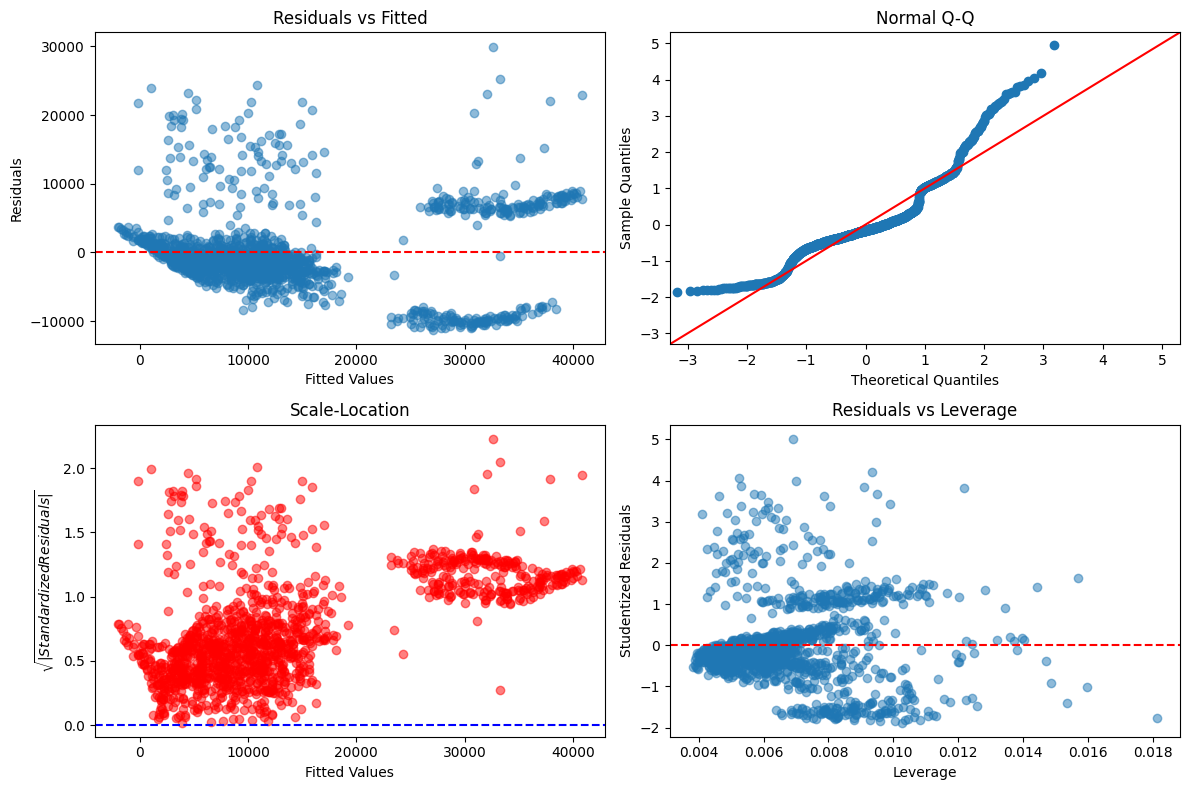

In [ ]:
fitted_values1 = model1.fittedvalues
residuals1 = model1.resid
standardized_residuals1 = model1.get_influence().resid_studentized_internal
leverage1 = model1.get_influence().hat_matrix_diag
studentized_residuals1 = model1.get_influence().resid_studentized_external

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residuals vs Fitted
axes[0, 0].scatter(fitted_values1, residuals1, alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')

# Normal Q-Q Plot
sm.qqplot(residuals1, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q')

# Scale-Location Plot
axes[1, 0].scatter(fitted_values1, np.sqrt(np.abs(standardized_residuals1)), alpha=0.5, color='red')
axes[1, 0].axhline(y=0, color='blue', linestyle='--')
axes[1, 0].set_title('Scale-Location')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel(r'$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
axes[1, 1].scatter(leverage1, studentized_residuals1, alpha=0.5)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Studentized Residuals')


# Menampilkan plot
plt.tight_layout()
plt.show()

Berikut adalah interpretasi dari pengujian asumsi seperti normalitas, homoskedastis, dan independensi pada model 1
1.  Residuals vs Fitted: Terlihat pola berbentuk 3 kurva, menunjukkan adanya ketidaksesuaian dalam asumsi linearitas. Residual tidak tersebar acak di sekitar nol, yang mengindikasikan model ini mungkin tidak sepenuhnya tepat.
2.  Normal Q-Q: Titik-titik mengikuti garis teoretis di bagian tengah, namun ada deviasi di kedua ujung, menunjukkan bahwa residual mungkin tidak sepenuhnya berdistribusi normal.
3.  Scale-Location: Penyebaran residual meningkat pada fitted values yang lebih besar, menunjukkan heteroskedastisitas, yang berarti varians residual tidak konstan.
4.  Residuals vs Leverage: Tidak ada titik yang sangat jauh di leverage tinggi, menunjukkan tidak ada outlier kuat yang signifikan mempengaruhi model.


Berdasarkan hasil, model 1 tidak memenuhi asumsi normalitas dan homoskedastis, tidak signifikan uji t, namun memenuhi asumsi independensi.


## Model 2

Dikarenakan adanya kekurangan pada model 1 yaitu ketidaksignifikanan uji t dan asumsi yang dilanggar maka dibuatlah model 2. Pada model ini, digunakan seluruh variabel penjelas terhadap variabel respon yaitu ‘log_charges’ yang merupakan hasil transformasi logaritma natural dari variabel ‘charges’.


In [ ]:
# Transformasi variabel dependent
data_scaled['log_charges'] = np.log(data['charges'])

# Model dengan variabel dependen yang ditransformasi dan interaksi
model2 = smf.ols('log_charges ~ age + C(sex)+ C(smoker) + bmi + children + C(region)', data=data_scaled).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:10:26   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7

Berdasarkan hasil model di atas didapatkan hasil:

1.  Uji t yang tidak signifikan pada variabel dummy region pada level northwest yang ditunjukkan pada nilai p-value statistik uji t > 0.05. Hal ini menandakan bahwa variabel dummy region pada level northwest tidak berpengaruh dalam menjelaskan ‘log_charges’ pada model.
2.  Nilai Uji F yang besar yaitu 549.8 menandakan model dapat menjelaskan ‘log_charges’ dengan baik. Hal ini juga bisa menjadi praduga bahwa adanya multikolinearitas karena uji F yang signifikan namun uji t tidak signifikan.
3.  Nilai R-squared 0.768 berarti 76.8% variansi ‘log_charges’ dapat dijelaskan oleh model.
4.  Berdasarkan Jarque Bera memiliki nilai *p-value* < 0.05 yang menunjukkan pelanggaran normalitas dari data.
5.  Nilai Durbin Watson yang berada di antara 1.0 s.d. 2.5 menunjukkan independensi terpenuhi.


Model ini masih kurang baik karena masih terdapat variabel yang tidak signifikan pada model. Selanjutnya akan dilakukan uji asumsi terhadap model 2 sebelum membuat model lainnya.


### Uji Asumsi model 2

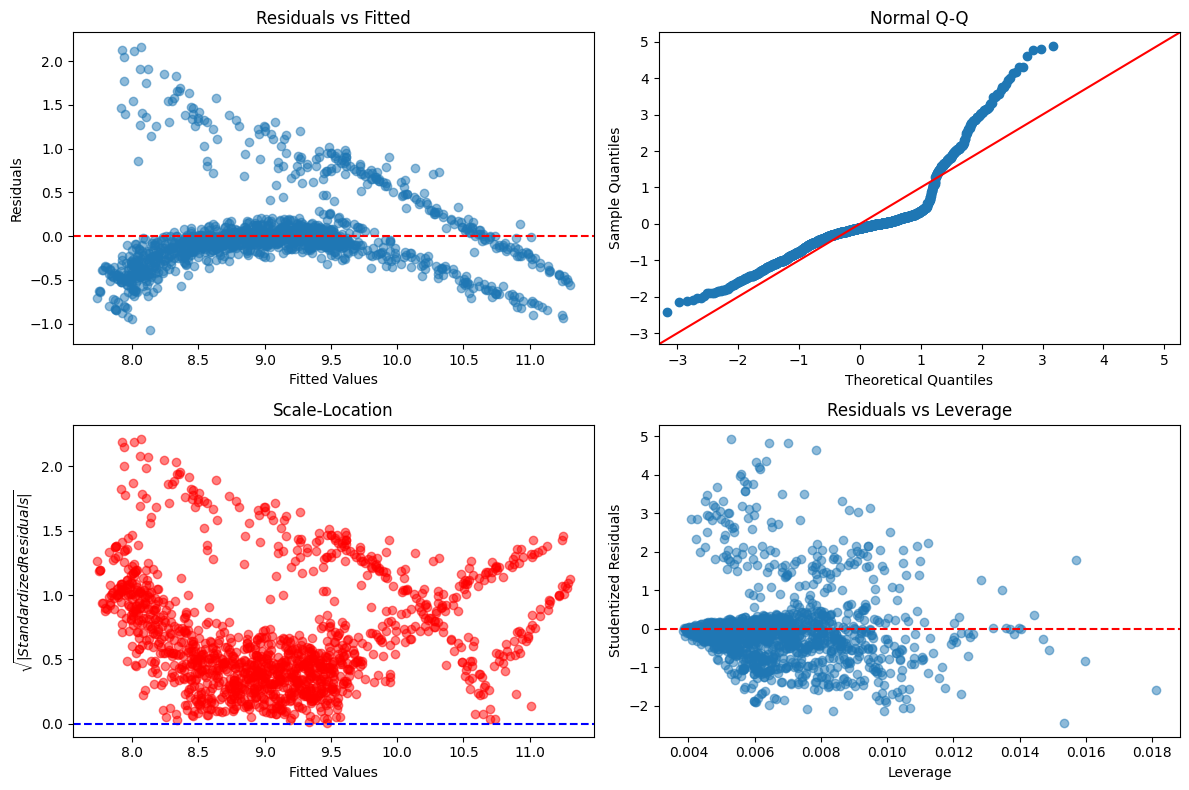

In [ ]:
fitted_values2 = model2.fittedvalues
residuals2 = model2.resid
standardized_residuals2 = model2.get_influence().resid_studentized_internal
leverage2 = model2.get_influence().hat_matrix_diag
studentized_residuals2 = model2.get_influence().resid_studentized_external

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residuals vs Fitted
axes[0, 0].scatter(fitted_values2, residuals2, alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')

# Normal Q-Q Plot
sm.qqplot(residuals2, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q')

# Scale-Location Plot
axes[1, 0].scatter(fitted_values2, np.sqrt(np.abs(standardized_residuals2)), alpha=0.5, color='red')
axes[1, 0].axhline(y=0, color='blue', linestyle='--')
axes[1, 0].set_title('Scale-Location')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel(r'$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
axes[1, 1].scatter(leverage2, studentized_residuals2, alpha=0.5)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Studentized Residuals')


# Menampilkan plot
plt.tight_layout()
plt.show()

Berikut adalah interpretasi dari pengujian asumsi seperti normalitas, homoskedastis, dan independensi pada model 2

1.  Residuals vs Fitted: Terdapat pola yang kuat, residual tidak tersebar acak. Ini menunjukkan model ini mungkin mengalami masalah asumsi linearitas.
2.  Normal Q-Q: Titik-titik di sekitar garis teoretis cukup baik, tetapi ada beberapa deviasi di ujung, mengindikasikan adanya ketidaksesuaian kecil dengan asumsi normalitas.
3.  Scale-Location: Terdapat pola yang menunjukkan adanya heteroskedastisitas, di mana residual tidak tersebar merata di sepanjang fitted values.
4.  Residuals vs Leverage: Tidak ada titik dengan leverage yang sangat tinggi yang menandakan pengaruh kuat pada model, tetapi perlu perhatian terhadap pengaruh-pengaruh kecil.


Berdasarkan hasil, model 2 hampir memenuhi asumsi normalitas, memenuhi independensi, namun tidak memenuhi asumsi homoskedastis serta signifikansi uji t.


## Model 3

Dikarenakan adanya kekurangan pada model 2 yaitu ketidaksignifikanan uji t,  asumsi yang dilanggar, dan pengaruh kuat *outliers* pada model 2 maka dibuatlah model 3. Pada model ini, akan digunakan seluruh variabel penjelas terhadap variabel respon yaitu ‘charges’ tanpa influential observation. Influential observation adalah data yang memiliki pengaruh besar pada garis linear (*outliers*) yang bisa saja membuat model kurang akurat karena bergantung pada data yang terlalu besar


In [ ]:
#Membuat nilai treshold
influence = model1.get_influence()
influence_df = influence.summary_frame()

threshold = 4 / (model1.nobs - (len(model1.params) -1) -1)

filtered_influence = influence_df[influence_df['cooks_d']<=threshold]

In [ ]:
model3 = smf.ols('charges ~ age + C(sex) + bmi + children + C(smoker) + C(region)', data=data_scaled.loc[filtered_influence.index, :]).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     855.5
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:10:30   Log-Likelihood:                -12341.
No. Observations:                1255   AIC:                         2.470e+04
Df Residuals:                    1246   BIC:                         2.475e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1963

Berdasarkan hasil model di atas didapatkan hasil:

1.  Uji t pada seluruh variabel signifikan yang ditunjukkan pada nilai p-value statistik uji t < 0.05. Hal ini menandakan bahwa seluruh variabel berpengaruh dalam menjelaskan ‘charges’ pada model.
2.  Nilai Uji F yang besar yaitu 855.5 menandakan model dapat menjelaskan ‘charges’ dengan baik.
3.  Nilai R-squared 0.846 berarti 84.6% variansi ‘charges’ dapat dijelaskan oleh model.
4.  Berdasarkan Jarque Bera memiliki nilai *p-value* < 0.05 yang menunjukkan pelanggaran normalitas dari data.
5.  Nilai Durbin Watson yang berada di antara 1.0 s.d. 2.5 menunjukkan independensi terpenuhi.

Selanjutnya akan dilakukan uji asumsi terhadap model 3 sebelum menentukan apakah model sudah baik atau perlu dilihat lagi kemungkinan model lainnya.


### Uji asumsi model 3

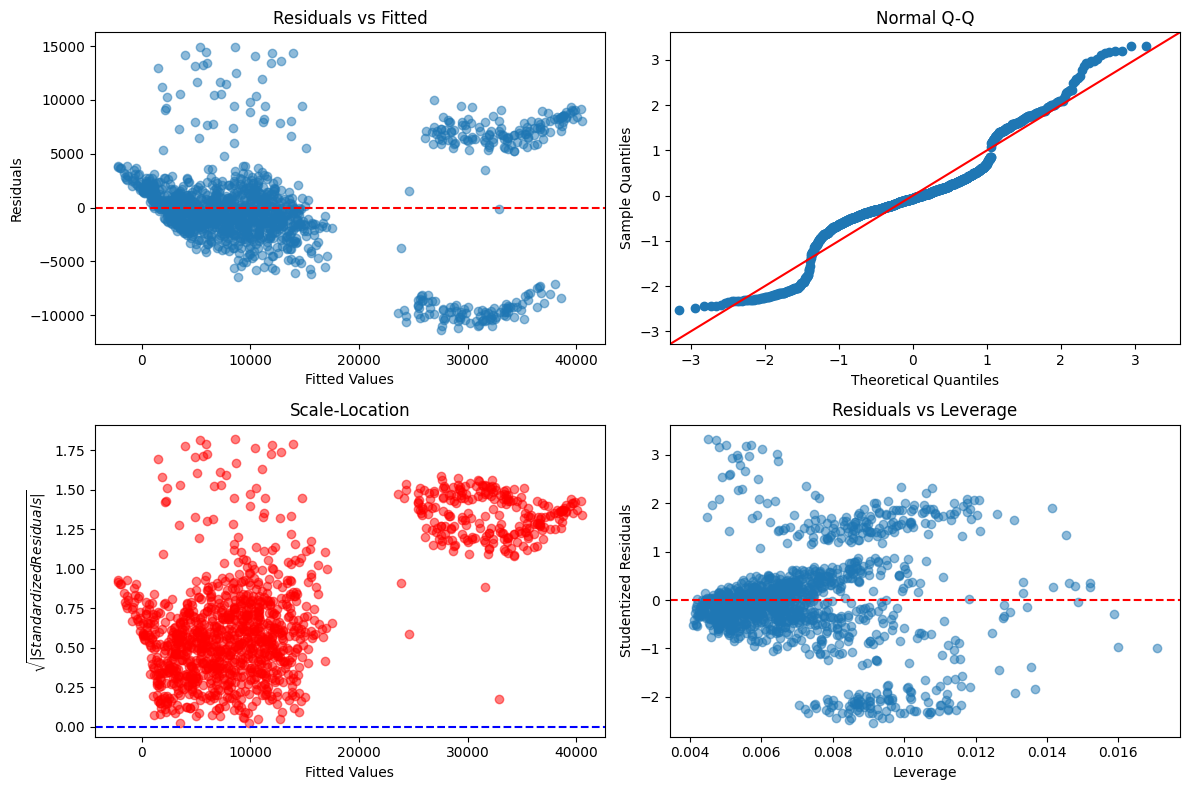

In [ ]:
fitted_values3 = model3.fittedvalues
residuals3 = model3.resid
standardized_residuals3 = model3.get_influence().resid_studentized_internal
leverage3 = model3.get_influence().hat_matrix_diag
studentized_residuals3 = model3.get_influence().resid_studentized_external

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residuals vs Fitted
axes[0, 0].scatter(fitted_values3, residuals3, alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')

# Normal Q-Q Plot
sm.qqplot(residuals3, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q')

# Scale-Location Plot
axes[1, 0].scatter(fitted_values3, np.sqrt(np.abs(standardized_residuals3)), alpha=0.5, color='red')
axes[1, 0].axhline(y=0, color='blue', linestyle='--')
axes[1, 0].set_title('Scale-Location')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel(r'$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
axes[1, 1].scatter(leverage3, studentized_residuals3, alpha=0.5)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Studentized Residuals')


# Menampilkan plot
plt.tight_layout()
plt.show()

Berikut adalah interpretasi dari pengujian asumsi seperti normalitas, homoskedastis, dan independensi pada model 3

1.  Residuals vs Fitted: Pola residual juga menunjukkan ketidaksesuaian linearitas. Ada dua kelompok residual yang berbeda, mengindikasikan model ini mungkin memerlukan transformasi.
2.  Normal Q-Q: Titik-titik sebagian besar sesuai dengan garis teoretis di tengah, namun menunjukkan deviasi pada kedua ujung, yang menunjukkan ada ketidaksesuaian dengan normalitas.
3.  Scale-Location: Terdapat variasi pada scale-location plot, yang mengindikasikan adanya heteroskedastisitas.
4.  Residuals vs Leverage: Titik dengan leverage tinggi masih dalam batas yang aman, tetapi perlu perhatian terhadap pola yang tampak di leverage rendah.


Berdasarkan hasil, model 3 tidak memenuhi asumsi normalitas dan  asumsi homoskedastis, namun memenuhi asumsi independensi dengan saran untuk model selanjutnya melakukan transformasi.


## Model 4
Berdasarkan hasil residual vs fitted diberikan saran untuk melakukan transformasi maka dari itu dibuatlah model 4. Pada model ini, akan digunakan seluruh variabel penjelas terhadap variabel respon yaitu ‘log_charges’ yang merupakan hasil transformasi logaritma natural dari variabel ‘charges’ tanpa influential observation.

In [ ]:
# Transformasi variabel dependent
data_scaled['log_charges'] = np.log(data['charges'])

# Model dengan variabel dependen yang ditransformasi dan interaksi
model4 = smf.ols('log_charges ~ age + C(sex)+ C(smoker) + bmi + children + C(region)', data=data_scaled.loc[filtered_influence.index, :]).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:            log_charges   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     874.6
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:11:05   Log-Likelihood:                -462.99
No. Observations:                1255   AIC:                             944.0
Df Residuals:                    1246   BIC:                             990.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7

Berdasarkan hasil model di atas didapatkan hasil:

1.  Uji t pada seluruh variabel signifikan yang ditunjukkan pada nilai p-value statistik uji t < 0.05. Hal ini menandakan bahwa seluruh variabel berpengaruh dalam menjelaskan ‘charges’ pada model.
2.  Nilai Uji F yang besar yaitu 874.6 menandakan model dapat menjelaskan ‘charges’ dengan baik.
3.  Nilai R-squared 0.849 berarti 84.9% variansi ‘charges’ dapat dijelaskan oleh model.
4.  Berdasarkan Jarque Bera memiliki nilai *p-value* < 0.05 yang menunjukkan pelanggaran normalitas dari data.
5.  Nilai Durbin Watson yang berada di antara 1.0 s.d. 2.5 menunjukkan independensi terpenuhi.

Selanjutnya akan dilakukan uji asumsi terhadap model 4 sebelum menentukan apakah model sudah baik atau perlu dilihat lagi kemungkinan model lainnya.


### Uji Asumsi model 4

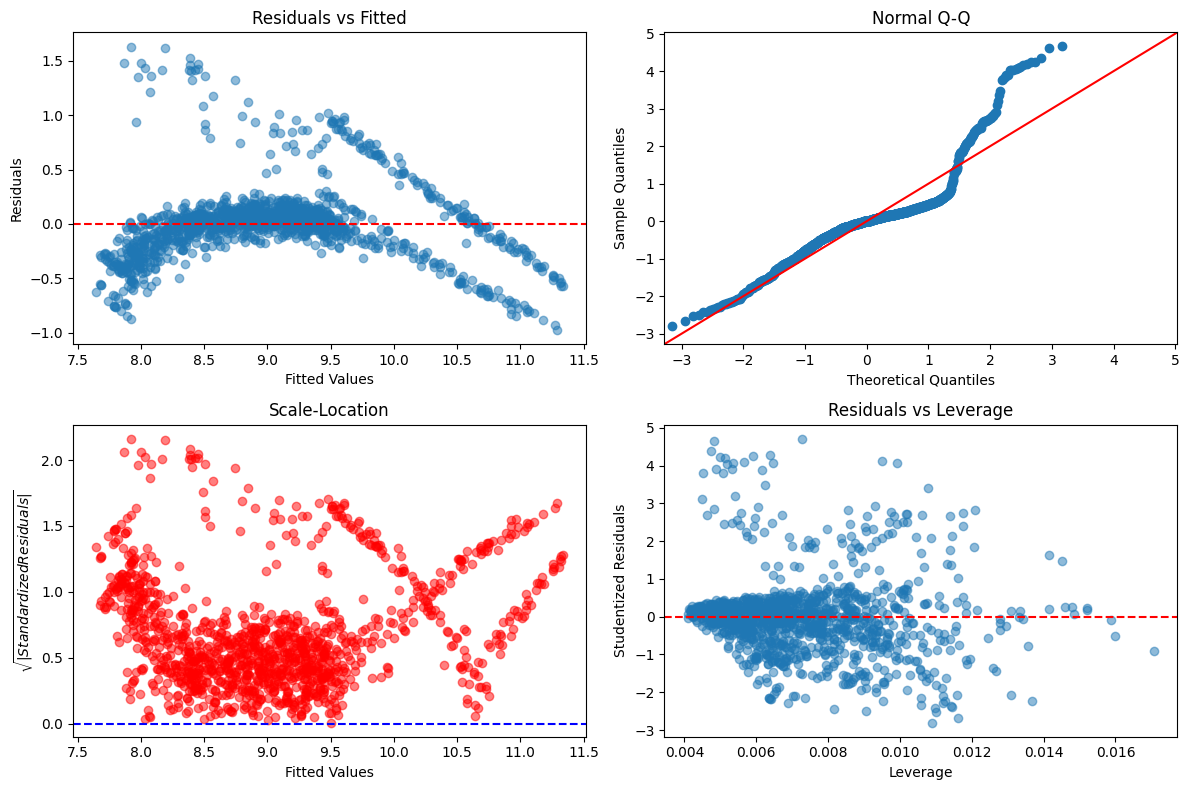

In [ ]:
fitted_values4 = model4.fittedvalues
residuals4 = model4.resid
standardized_residuals4 = model4.get_influence().resid_studentized_internal
leverage4 = model4.get_influence().hat_matrix_diag
studentized_residuals4 = model4.get_influence().resid_studentized_external

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Residuals vs Fitted
axes[0, 0].scatter(fitted_values4, residuals4, alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')

# Normal Q-Q Plot
sm.qqplot(residuals4, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q')

# Scale-Location Plot
axes[1, 0].scatter(fitted_values4, np.sqrt(np.abs(standardized_residuals4)), alpha=0.5, color='red')
axes[1, 0].axhline(y=0, color='blue', linestyle='--')
axes[1, 0].set_title('Scale-Location')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel(r'$\sqrt{|Standardized Residuals|}$')

# Residuals vs Leverage Plot
axes[1, 1].scatter(leverage4, studentized_residuals4, alpha=0.5)
axes[1, 1].axhline(y=0, color='red', linestyle='--')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Studentized Residuals')


# Menampilkan plot
plt.tight_layout()
plt.show()

Berikut adalah interpretasi dari pengujian asumsi seperti normalitas, homoskedastis, dan independensi pada model 4

1.  Residuals vs Fitted: Terdapat pola yang kuat, residual tidak tersebar acak. Ini menunjukkan model ini mungkin mengalami masalah asumsi linearitas.
2.  Normal Q-Q: Titik-titik di sekitar garis teoretis cukup baik, tetapi ada beberapa deviasi di ujung, mengindikasikan adanya ketidaksesuaian kecil dengan asumsi normalitas.
3.  Scale-Location: Terdapat pola yang menunjukkan adanya heteroskedastisitas, di mana residual tidak tersebar merata di sepanjang fitted values.
4.  Residuals vs Leverage: Tidak ada titik dengan leverage yang sangat tinggi yang menandakan pengaruh kuat pada model, tetapi perlu perhatian terhadap pengaruh-pengaruh kecil.


Berdasarkan hasil, model 4 hampir memenuhi asumsi normalitas, memenuhi asumsi independensi, namun tidak memenuhi asumsi homoskedastas.


## Model Lain yang Mungkin

Pada kesempatan ini, kami sudah melakukan beberapa permodelan lain seperti membentuk interaksi antar variabel dan memberikan bentuk kuadratik pada beberapa variabel. Namun tidak menghasilkan hasil yang baik seperti banyaknya ketidaksignifikanan pada variabel di uji t.

## Permasalahan Pelanggaran Asumsi

Kami sudah mencoba beberapa bentuk transformasi dan penyesuaian variabel yang digunakan namun didapatkan hasil yang tidak memenuhi asumsi normalitas dan homoskedastis pada setiap model. Sehingga kami menggunakan model terbaik dengan asumsi normalitas yang paling mendekati normal. Untuk itu asumsi normalitas dan homoskedastis tidak dapat diselesaikan pada saat ini dengan alasan data yang memang tidak berdistribusi normal dan variansi yang beragam.

# Memilih *Best Model*

Akan dipilih model terbaik dari model yang ada berdasarkan kriteria tertentu.

In [ ]:
# Mengambil R-squared, Adjusted R-squared, AIC, dan BIC dari setiap model
comparison = {
    'Model': ['Model 1', 'Model 2 ', 'Model 3 ', 'Model 4'],
    'R-squared': [model1.rsquared, model2.rsquared, model3.rsquared, model4.rsquared],
    'Adj. R-squared': [model1.rsquared_adj, model2.rsquared_adj, model3.rsquared_adj, model4.rsquared_adj],
    'AIC': [model1.aic, model2.aic, model3.aic, model4.aic],
    'BIC': [model1.bic, model2.bic, model3.bic, model4.bic]
}

# Menampilkan hasil perbandingan
comparison_df = pd.DataFrame(comparison)
print("Comparison of Models")
print(comparison_df)

Comparison of Models
      Model  R-squared  Adj. R-squared           AIC           BIC
0   Model 1   0.750913        0.749414  27113.505837  27160.296218
1  Model 2    0.767948        0.766551   1635.033399   1681.823780
2  Model 3    0.845986        0.844997  24699.797773  24746.011791
3   Model 4   0.848842        0.847872    943.978737    990.192754


Analisis Pemilihan Model
R-squared: Model 4 memiliki nilai R-squared tertinggi (0.8488), menunjukkan bahwa model ini dapat menjelaskan 84.8% dari variasi dalam variabel dependen, yang jauh lebih baik daripada Model 1, 2, dan 3.

Adjusted R-squared: Model 4 juga memiliki nilai Adjusted R-squared tertinggi (0.8478), yang menunjukkan bahwa model ini tidak hanya lebih baik dalam menjelaskan variasi tetapi juga tetap konsisten saat mempertimbangkan jumlah variabel independen.

AIC dan BIC:

AIC dan BIC adalah indikator untuk pemilihan model dalam regresi. Model dengan nilai AIC dan BIC yang lebih rendah merupakan model yang lebih baik. Model 4 memiliki AIC dan BIC terendah, yang menunjukkan bahwa ini adalah model yang paling efisien.


Dengan notasi model 4 :

log(charges) = 7.7811 - 0.0699 C(sex)[T.male] +  1.6273 C(smoker)[T.yes]  - 0.0930 C(region)[T.northwest]  - 0.1630  C(region)[T.southeast] - 0.1244 C(region)[T.southwest]    + 1.6407  age  +  0.5102 bmi +    0.5000 children


MODEL TERBAIK ADALAH **MODEL 4**

# Penutup

Dalam mengukur biaya asuransi kesehatan yang dipengaruhi oleh beberapa faktor seperti usia, jenis kelamin, BMI, status merokok, dan kondisi demografis. Bisa menggunakan model yaitu

log_charges = 7.7811 - 0.0699(sex_male) + 1.6273(smoker_yes) - 0.093 (region_northwest) - 0.163 (region_southwest) - 0.1244(region_southwest) + 1.64(age) + 0.5102(bmi) + 0.5(children)

Interpretasi Koefisien untuk Setiap Variabel Prediktor
1.  Intercept (7.7811): Ketika semua variabel prediktor bernilai nol (misalnya, perempuan, bukan perokok, dan tinggal di wilayah referensi), nilai prediksi dari logaritma biaya asuransi kesehatan adalah 7.7811.
2.  sex_male (-0.0699): Jika seseorang berjenis kelamin laki-laki, maka nilai log_charges akan berkurang sebesar 0.0699 dibandingkan dengan perempuan (karena perempuan menjadi referensi dalam model). Dengan kata lain, menjadi laki-laki akan menurunkan nilai prediksi logaritma biaya asuransi kesehatan.
3.  smoker_yes (1.6273): Jika seseorang adalah perokok, maka nilai log_charges akan meningkat sebesar 1.6273 dibandingkan dengan orang yang bukan perokok. Ini menunjukkan bahwa merokok secara signifikan meningkatkan biaya asuransi kesehatan, yang konsisten dengan fakta bahwa perokok cenderung memiliki risiko kesehatan lebih tinggi.
4.  region_northwest (-0.093): Jika seseorang tinggal di wilayah Northwest, maka nilai log_charges akan berkurang sebesar 0.093. Ini menunjukkan bahwa tinggal di Northwest sedikit menurunkan biaya asuransi.
5.  region_southwest (-0.163): Jika seseorang tinggal di wilayah Southwest, nilai log_charges akan berkurang sebesar 0.163. Artinya, tinggal di Southwest menurunkan biaya asuransi lebih banyak dibandingkan Northwest.
6.  region_southeast (-0.1244): Jika seseorang tinggal di wilayah Southeast, nilai log_charges akan berkurang sebesar 0.1244. Tinggal di Southeast juga menurunkan biaya, tetapi tidak sebanyak Southwest.
7.  age (1.64): Untuk setiap peningkatan satu tahun usia, nilai log_charges akan meningkat sebesar 1.64. Ini berarti semakin tua seseorang, semakin tinggi biaya asuransi kesehatan, mengingat bahwa usia yang lebih tua biasanya terkait dengan risiko kesehatan yang lebih besar.
8.  bmi (0.5102): Untuk setiap peningkatan satu unit dalam BMI, nilai log_charges akan meningkat sebesar 0.5102. Ini menunjukkan bahwa BMI yang lebih tinggi terkait dengan peningkatan biaya asuransi kesehatan.
9.  children (0.5): Untuk setiap tambahan satu anak yang diasuransikan, nilai log_charges akan meningkat sebesar 0.5. Ini menunjukkan bahwa memiliki lebih banyak anak yang tercakup dalam asuransi meningkatkan biaya total asuransi.

Model ini diperoleh dengan menstandarisasi variabel penjelas, kemudian menerapkan transformasi logaritma, dan mengeluarkan observasi yang berpengaruh signifikan (influential observations). Model ini dinilai sebagai yang terbaik untuk mengestimasi besaran biaya asuransi, meskipun masih memiliki keterbatasan dalam memenuhi asumsi normalitas dan homoskedastisitas. Keterbatasan ini diperkirakan disebabkan oleh persebaran data yang kurang merata.
